# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [8]:
tracks = pd.read_parquet('tracks.parquet')
catalog = pd.read_parquet('catalog_names.parquet')
interactions = pd.read_parquet('interactions.parquet')

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

#### Tracks

In [10]:
tracks.head()

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]


In [9]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [25]:
tracks.describe()

,track_id
count,1.000000e+06
mean,3.685121e+07
std,2.679771e+07
min,2.600000e+01
25%,1.543088e+07
50%,3.455047e+07
75%,5.692557e+07
max,1.015218e+08


#### Catalog

In [12]:
catalog.head()

,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack


In [13]:
catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


In [24]:
catalog.describe()

,id
count,1.812471e+06
mean,2.321647e+07
std,2.526044e+07
min,0.000000e+00
25%,3.480524e+06
50%,1.211436e+07
75%,3.773817e+07
max,1.015218e+08


#### Interactions

In [14]:
interactions.head()

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


In [15]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [23]:
interactions.describe()

,user_id,track_id,track_seq,started_at
count,2.226299e+08,2.226299e+08,2.226299e+08,222629898
mean,6.875767e+05,3.653622e+07,4.621403e+02,2022-08-29 16:39:44.541336320
min,0.000000e+00,2.600000e+01,1.000000e+00,2022-01-01 00:00:00
25%,3.433710e+05,1.480849e+07,5.600000e+01,2022-07-02 00:00:00
50%,6.879730e+05,3.552474e+07,1.810000e+02,2022-09-15 00:00:00
75%,1.031127e+06,5.651137e+07,5.060000e+02,2022-11-09 00:00:00
max,1.374582e+06,1.015218e+08,1.663700e+04,2022-12-31 00:00:00
std,3.969033e+05,2.661782e+07,8.257312e+02,NaN


In [52]:
catalog['type'].value_counts()

type
track     1000000
album      658724
artist     153581
genre         166
Name: count, dtype: int64

In [9]:
# уникальные id альбомов, исполнителей и жанров в tracks
id_album_tracks = set([id for sublist in tracks['albums'] for id in sublist])
id_artist_tracks = set([id for sublist in tracks['artists'] for id in sublist])
id_genre_tracks = set([id for sublist in tracks['genres'] for id in sublist])

# уникальные id из catalog
id_album_cat = set(catalog[catalog['type'] == 'album']['id'])
id_artist_cat = set(catalog[catalog['type'] == 'artist']['id'])
id_genre_cat = set(catalog[catalog['type'] == 'genre']['id'])

# неизвестные id альбомов, исполнителей и жанров в tracks
unknown_id_album = id_album_tracks - id_album_cat
unknown_id_artist = id_artist_tracks - id_artist_cat
unknown_id_genre = id_genre_tracks - id_genre_cat

print('Неизвестные id альбомов: ', unknown_id_album)
print('Неизвестные id исполнителей: ', unknown_id_artist)
print('Неизвестные id жанров: ', unknown_id_genre)

Неизвестные id альбомов:  set()
Неизвестные id исполнителей:  set()
Неизвестные id жанров:  {130, 131, 132, 133, 134, 135, 146, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 124, 126}


In [10]:
# количество неизвестных жанров
len(unknown_id_genre)

30

In [11]:
# добавляем неизвестные жанры в каталог
rows = []

for i in unknown_id_genre:
    d = {'id': i,
        'type': "genre",
        'name': "unknown"}
    rows.append(d)

unk_genre = pd.DataFrame(rows)
catalog = pd.concat([catalog, unk_genre], ignore_index=True)

In [6]:
catalog.to_parquet('catalogs_add.parquet', index=False)

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.


В данных пропусков нет. Тип данных соответствует каждому признаку. Заметил, что слишком много использовано памяти в таблице interactions: memory usage: 5.4 GB по сравнению с другими таблицами. 

Неизвестных id альбомов и исполнителей нет, но есть неизвестные id жанров, их количество 30, добавил их в каталог с названиями "unknown", мало ли в дальнейшем пригодятся.

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

In [12]:
interactions

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22
...,...,...,...,...
287,1374582,95514767,288,2022-12-29
288,1374582,97220301,289,2022-12-29
289,1374582,97241171,290,2022-12-29
290,1374582,98542641,291,2022-12-29


In [17]:
interactions.groupby('track_id').size().sort_values(ascending=False).reset_index(name='count')

,track_id,count
0,53404,111062
1,33311009,106921
2,178529,101924
3,35505245,99490
4,65851540,86670
...,...,...
999995,84391078,5
999996,84391079,5
999997,84391080,5
999998,34766819,5


        track_id   count
0          53404  111062
1       33311009  106921
2         178529  101924
3       35505245   99490
4       65851540   86670
...          ...     ...
999995  84391078       5
999996  84391079       5
999997  84391080       5
999998  34766819       5
999999  34766901       5

[1000000 rows x 2 columns]


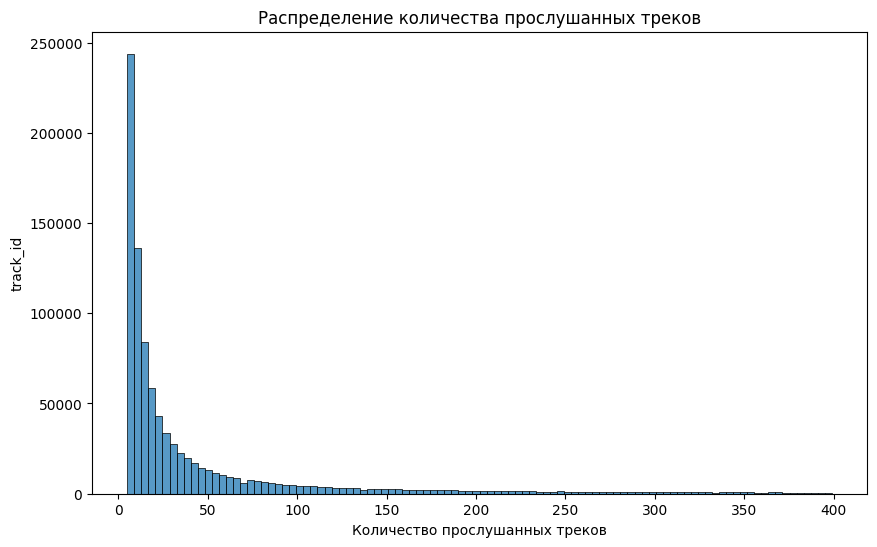

In [12]:
count_distribution = interactions.groupby('track_id').size().sort_values(ascending=False).reset_index(name='count')
print(count_distribution)

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(count_distribution.query("count < 400"), x='count', bins=100)

plt.title("Распределение количества прослушанных треков")
plt.xlabel("Количество прослушанных треков")
plt.ylabel("track_id")
plt.show()

In [87]:
count_distribution.to_parquet('data/count_distribution.parquet')

Наиболее популярные треки

                      name   count
0  Smells Like Teen Spirit  111062
1                 Believer  106921
2                     Numb  101924
3               I Got Love   99490
4                   Юность   86670
5           Way Down We Go   86246
6             Shape of You   85886
7               In The End   85244
8        Shape Of My Heart   85042
9                     Life   84748


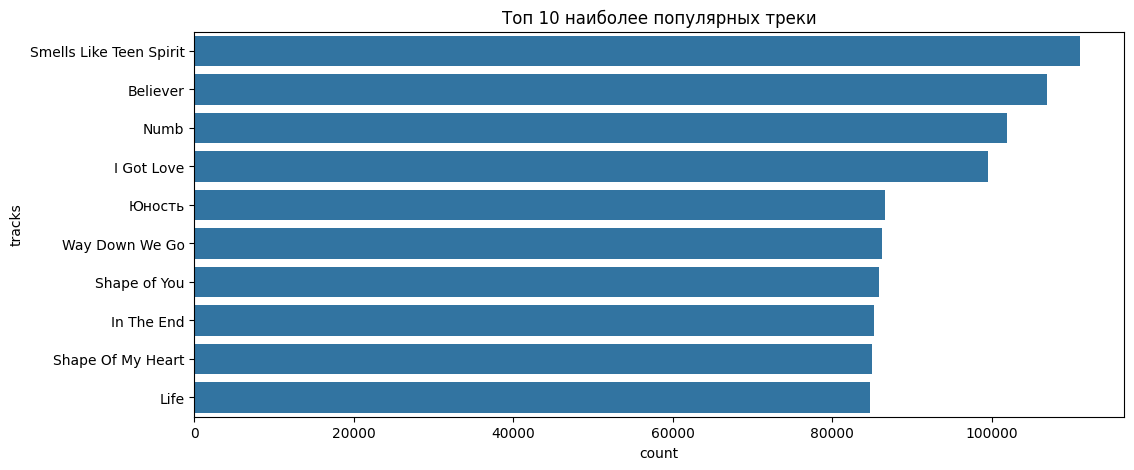

In [13]:
catalog_tracks = catalog[catalog['type'] == 'track']
popular_tracks = catalog_tracks.merge(count_distribution, left_on='id', right_on='track_id')
popular_tracks = popular_tracks.sort_values('count', ascending=False).head(10).reset_index(drop=True)
popular_tracks_top10 = popular_tracks.head(10)
print(popular_tracks_top10[['name','count']])

fig, axs = plt.subplots(1, 1, figsize=(12, 5))
sns.barplot(popular_tracks_top10, x='count', y='name')

plt.title("Топ 10 наиболее популярных треки")
plt.ylabel("tracks")
plt.show()

In [86]:
popular_tracks.to_parquet('data/popular_tracks.parquet')

Наиболее популярные жанры

In [28]:
popular_genres = count_distribution.merge(tracks[['track_id','genres']], on='track_id', how='left')
popular_genres

,track_id,count,genres
0,53404,111062,"[13, 14, 102]"
1,33311009,106921,"[14, 102]"
2,178529,101924,"[41, 47]"
3,35505245,99490,"[3, 75]"
4,65851540,86670,"[11, 20]"
...,...,...,...
999995,84391078,5,[62]
999996,84391079,5,[62]
999997,84391080,5,[62]
999998,34766819,5,[13]


In [29]:
popular_genres_exp = popular_genres.explode('genres')
popular_genres_exp = popular_genres_exp.groupby('genres')['count'].sum().reset_index()
popular_genres_exp = popular_genres_exp.sort_values(by='count', ascending=False).reset_index(drop=True)
popular_genres_exp

,genres,count
0,11,55578312
1,75,37799821
2,102,31092013
3,20,26626241
4,3,25303695
...,...,...
168,166,207
169,106,61
170,148,54
171,150,30


          name     count
0          pop  55578312
1          rap  37799821
2      allrock  31092013
3       ruspop  26626241
4       rusrap  25303695
5  electronics  20120981
6        dance  16291557
7      rusrock  13166147
8         rock  12772644
9        metal  12437375


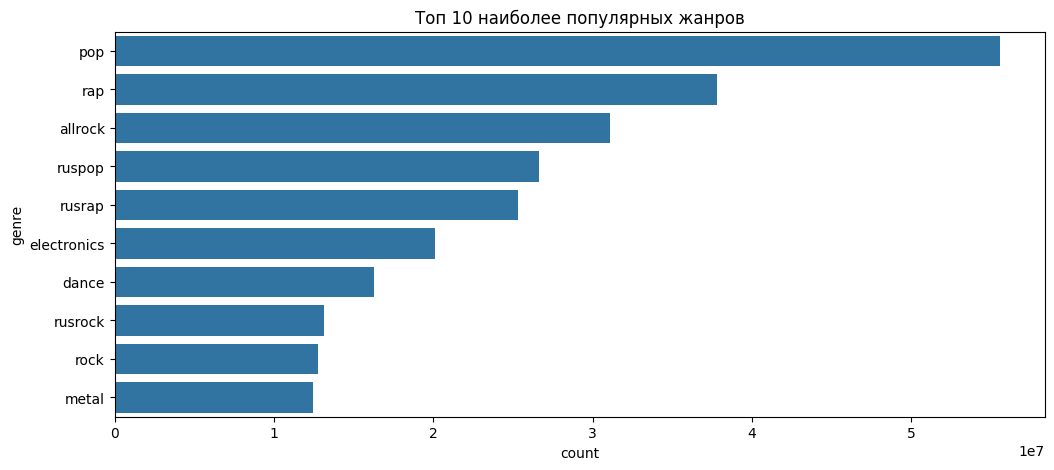

In [30]:
# объединил названия жанров с количеством жанров
name_genre = catalog[catalog['type'] == 'genre']
popular_genres_exp = popular_genres_exp.merge(name_genre, left_on='genres', right_on='id')
popular_genres_top10 = popular_genres_exp.head(10)
print(popular_genres_top10[['name','count']])

fig, axs = plt.subplots(1, 1, figsize=(12, 5))
sns.barplot(popular_genres_top10, x='count', y='name')

plt.title("Топ 10 наиболее популярных жанров")
plt.ylabel("genre")
plt.show()


In [32]:
popular_genres_exp.to_parquet('data/popular_genres.parquet')

Треки, которые никто не прослушал

In [19]:
id_tracks = set(tracks['track_id'])
id_tracks_inter = set(interactions['track_id'])
difference_tracks = id_tracks - id_tracks_inter
print("Треки, которые никто не прослушал: ", len(difference_tracks))

Треки, которые никто не прослушал:  0


# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [33]:
tracks.to_parquet('recsys/data/items.parquet', index=False)

In [34]:
interactions.to_parquet('recsys/data/events.parquet', index=False)

# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

# Топ популярных

Рассчитаем рекомендации как топ популярных.

# Персональные

Рассчитаем персональные рекомендации.

# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.